In [65]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt

In [66]:
# Carregando o conjunto de dados Iris
iris = load_iris()
x = iris.data
y = iris.target

In [67]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### KNN

- Supervisionado

In [68]:
k_values = range(1, 21)

In [69]:
# Avaliando o desempenho do KNN para diferentes valores de K
knn_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)

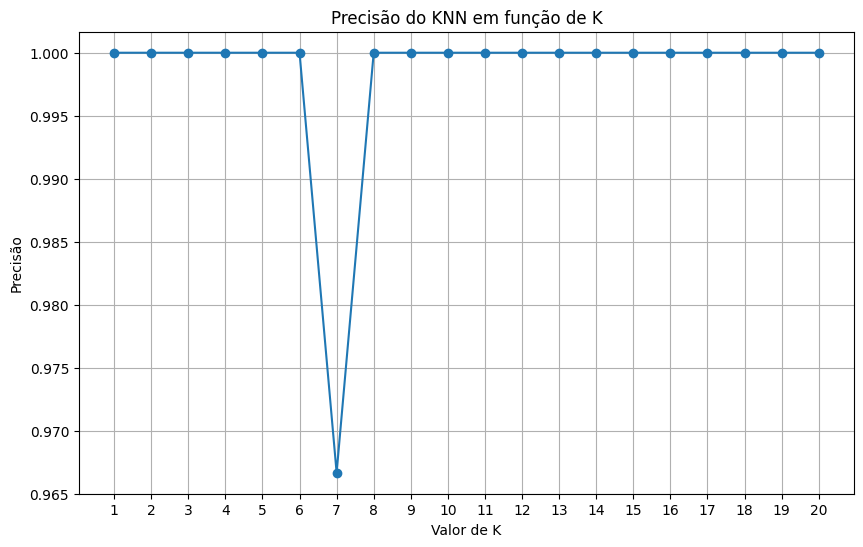

In [70]:
# Plotando a curva de precisão do KNN em função de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('Precisão do KNN em função de K')
plt.xlabel('Valor de K')
plt.ylabel('Precisão')
plt.xticks(k_values)
plt.grid(True)
plt.show()

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Flor |
|------|------|------|------|------|
| 5.1 | 3.5 | 1.4 | 0.2 |  0 |
| 4.9 | 3. |  1.4 | 0.2 |  0 |
| 6.2 | 3.4 | 5.4 | 2.3 |  2 |
| 5.9 | 3. |  5.1 | 1.8 |  2 |

Incluindo novo test:
| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm)
|------|------|------|------|
| 5.7 | 3.8 | 1.7 | 0.3 |

Distancia = (((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2) + ((w2 - w1) ** 2)) ** (1 / 2)

| Flor | Distância |
|------|-----------|
| 0 | 0.7416198487095667 |
| 0 | 1.1747340124470729 |
| 2 | 4.254409477236529 |
| 2 | 3.806573262134856 |

In [71]:
def distancia_euclidiana(x1, x2, y1, y2, z1, z2, w1, w2):
    return (((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2) + ((w2 - w1) ** 2)) ** (1 / 2)

In [72]:
plantas = [
[5.1 , 3.5 , 1.4 , 0.2 ,  0 ],
[4.9 , 3. ,  1.4 , 0.2 ,  0 ],
[6.2 , 3.4 , 5.4 , 2.3 ,  2 ],
[5.9 , 3. ,  5.1 , 1.8 ,  2 ],
]

In [73]:
for planta in plantas:
    dist = distancia_euclidiana(5.7, planta[0], 3.8, planta[1], 1.7, planta[2], 0.3, planta[3])
    print(planta[4], dist)

0 0.7416198487095667
0 1.1747340124470729
2 4.254409477236529
2 3.806573262134856


### Kmeans

- Não Supervisionado

In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [75]:
centroids = kmeans.cluster_centers_
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

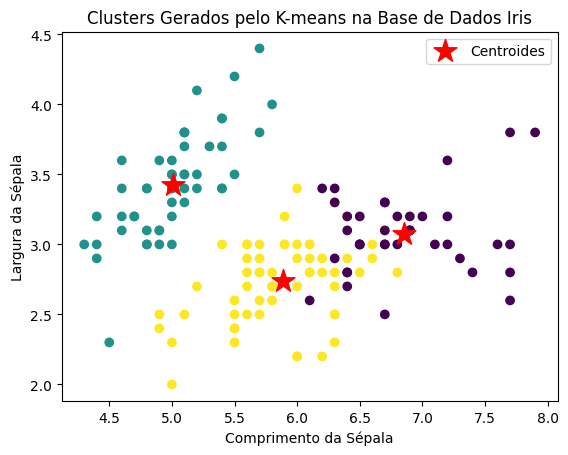

In [76]:
x1 = [1, 2, 3, 4, 5, 6]
y1 = [10, 8, 7, 8, 5, 9]

# Plotando os clusters
labels = kmeans.labels_
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroides')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Clusters Gerados pelo K-means na Base de Dados Iris')
plt.legend()
plt.show()

### Diferenças

O KMEANS por ser não supervisionado, ele aprende "sozinho" não necessitando de ter a informação do Y para poder segmentar os registros.